## Predictive Model for Residuary Resistance of Sailing Yachts using Yacht Hydrodynamics data

It was of interest to develop a model to predict the residuary resistance of sailing yachts as a function of basic hull geometries and boat velocity. In turn, the residuary resistance values can be used to assess the performance of the yachts and for estimating the required propulsive power. 

The variables measured were:
- Longitudinal position of the center of buoyancy (adimensional)
- Prismatic coefficient (adimensional) 
- Length-displacement ratio (adimensional) 
- Beam-draught ratio (adimensional) 
- Length-beam ratio (adimensional) 
- Froude number (adimensional)
- Residuary resistance per unit weight of displacement (adimensional)

The dataset used was collected from the UCI machine learning repository: http://archive.ics.uci.edu/ml/datasets/yacht+hydrodynamics

The link to the azure notebook is: https://yachthydrodynamic-pmani.notebooks.azure.com/j/notebooks/Yacht%20Hydrodynamics%20Predictive%20Model.ipynb

Author: Pavan Mani

In [1]:
# Download data file
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data -o yacht_hydro.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11487  100 11487    0     0  55225      0 --:--:-- --:--:-- --:--:-- 55225


In [3]:
import pandas as pd

# Creat dataframe
df = pd.read_csv('yacht_hydro.data', delim_whitespace=True, names=['Longitudinal Position','Prismatic Coefficient','Length-Displacement Ratio','Beam-Draught Ratio','Length-Beam Ratio','Froude Number','Residuary Resistance'])

df.head()

,Longitudinal Position,Prismatic Coefficient,Length-Displacement Ratio,Beam-Draught Ratio,Length-Beam Ratio,Froude Number,Residuary Resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [5]:
# Check dataset size
df.shape

(308, 7)

In [6]:
# Check for any missing data values
df.isnull().values.any()

False

In [7]:
# Check for any repeated rows of data
df[df.duplicated(keep=False)]

,Longitudinal Position,Prismatic Coefficient,Length-Displacement Ratio,Beam-Draught Ratio,Length-Beam Ratio,Froude Number,Residuary Resistance


In [10]:
# Check that the data value types match the column headers
df.dtypes

Longitudinal Position        float64
Prismatic Coefficient        float64
Length-Displacement Ratio    float64
Beam-Draught Ratio           float64
Length-Beam Ratio            float64
Froude Number                float64
Residuary Resistance         float64
dtype: object

In [11]:
# Summarise distribution of the dataset variables
df.describe()

,Longitudinal Position,Prismatic Coefficient,Length-Displacement Ratio,Beam-Draught Ratio,Length-Beam Ratio,Froude Number,Residuary Resistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


From the summary table of the dataset variables we can see that the standard deviation of the residuary resistance data is unusually large (15.2). As the coefficient of variance is above 1 (the standard deviation is larger then the mean), this suggests that the distribution for residuary resistance is skewed. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b0038fac8>,
      dtype=object)

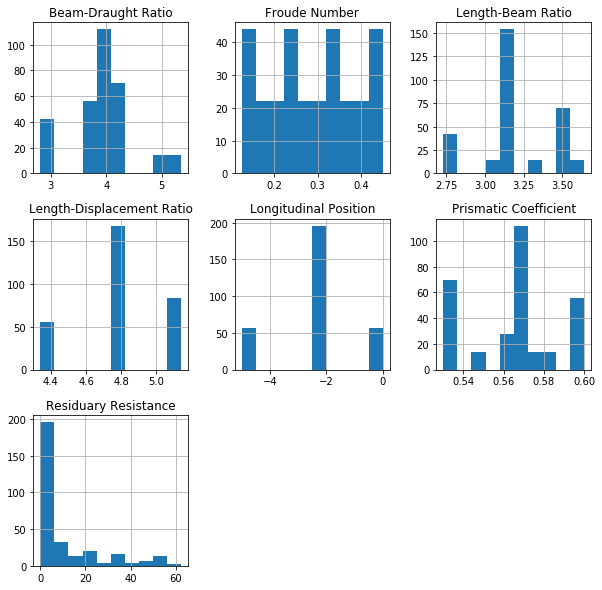

In [14]:
import matplotlib.pyplot as plt

# Visualise distribution of the dataset variables
df.hist(figsize=(10,10))

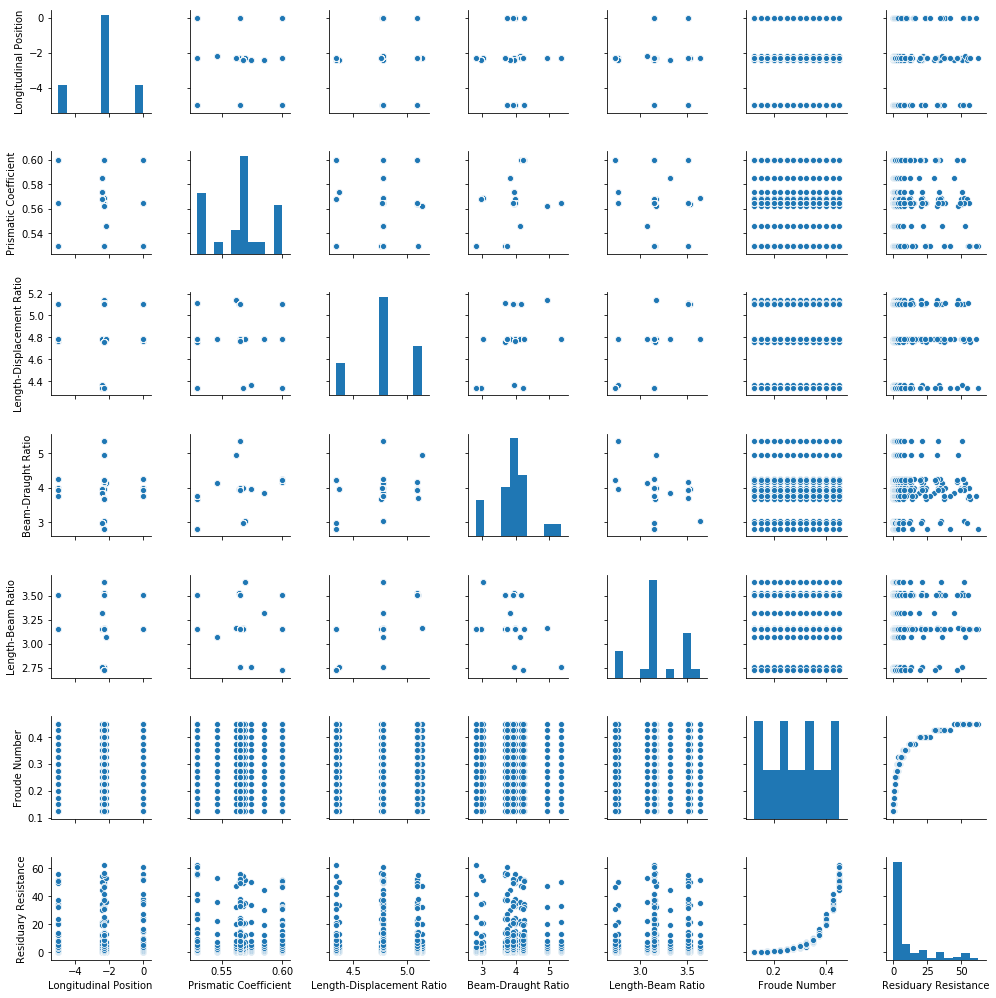

In [15]:
import seaborn as sns

# Visualise correlation between dataset variables
sns.pairplot(df,height=2.0)

From the pair-wise plot we can see that the data for residuary resistance is heavily right skewed and the relationship between resiudary resistance and Froude number is seemingly exponential. Based on these observations, it would be more useful to apply a natural logarithmic tranformation to the residuary resistance data.

In [17]:
import numpy as np

# Apply log transformation to response variable
df['Logged Residuary Resistance'] = np.log(df['Residuary Resistance'])
df.head()

,Longitudinal Position,Prismatic Coefficient,Length-Displacement Ratio,Beam-Draught Ratio,Length-Beam Ratio,Froude Number,Residuary Resistance,Logged Residuary Resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11,-2.207275
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27,-1.309333
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47,-0.755023
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78,-0.248461
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18,0.165514


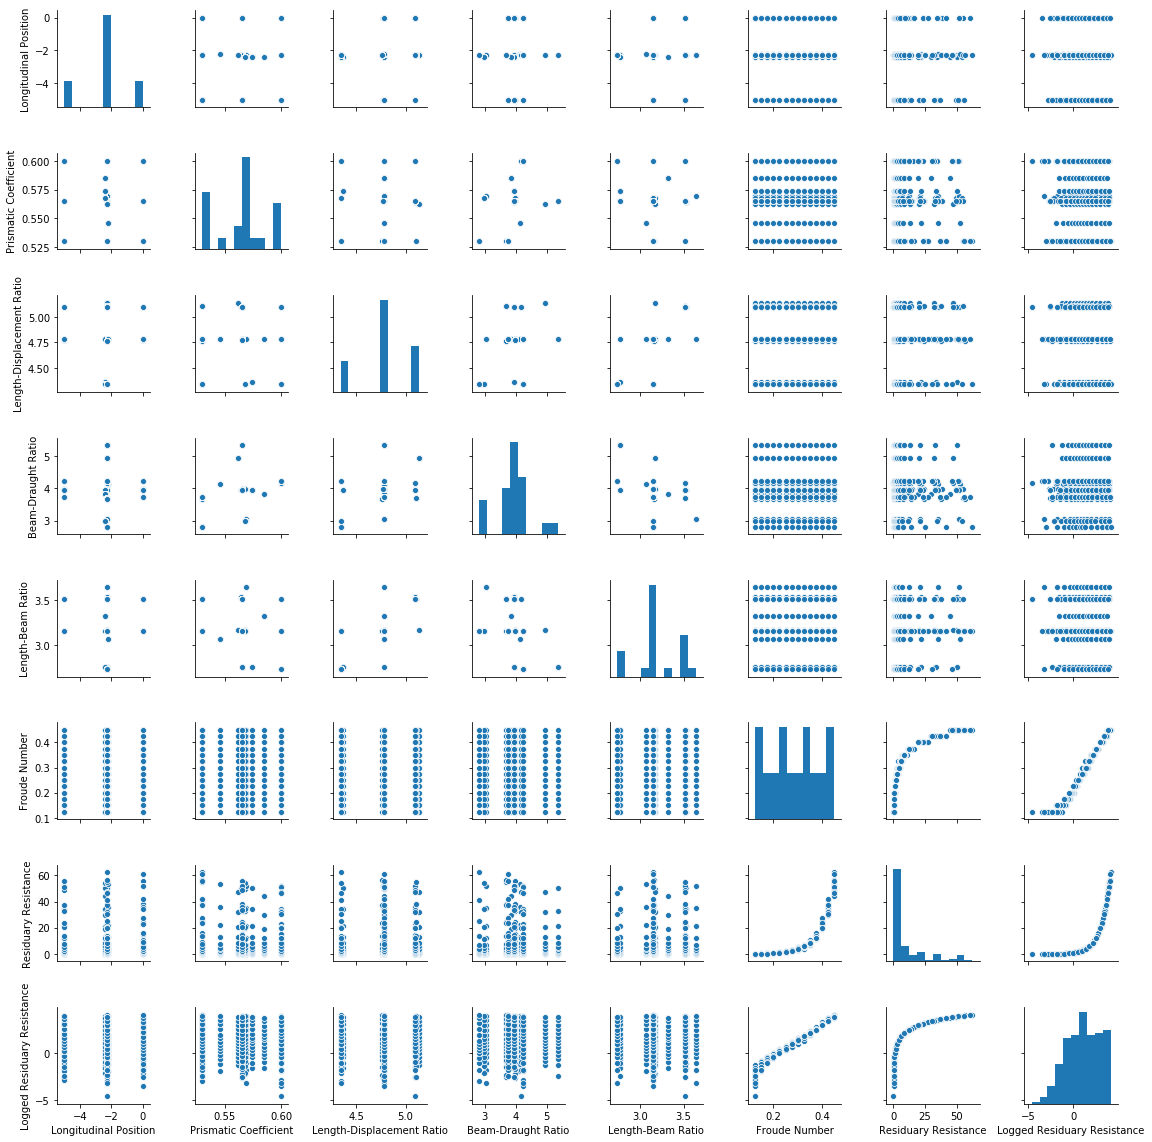

In [18]:
# Visualise correlation between dataset variables
sns.pairplot(df,height=2.0)

After applying a log transformation, we can see that the relationship between residuary resistance and the variables measuring basic hull geometries are less scattered. Additionally, there is a seemingly linear relationship between residuary resistance and the Froude number. We can satisfy normality and equality of variance assumptions through the Central Limit Theorem as we have a large sample size (308 observations).

In [19]:
# Create correlation matrix of dataset variables
df.corr()

,Longitudinal Position,Prismatic Coefficient,Length-Displacement Ratio,Beam-Draught Ratio,Length-Beam Ratio,Froude Number,Residuary Resistance,Logged Residuary Resistance
Longitudinal Position,1.000000e+00,-8.610666e-03,-2.674076e-03,2.928595e-03,-3.369351e-03,-1.668376e-17,0.019306,0.017711
Prismatic Coefficient,-8.610666e-03,1.000000e+00,-4.631607e-02,3.394618e-01,-8.669450e-02,1.682471e-17,-0.028569,-0.012212
Length-Displacement Ratio,-2.674076e-03,-4.631607e-02,1.000000e+00,3.768233e-01,6.763646e-01,-2.300562e-17,-0.002967,0.014428
Beam-Draught Ratio,2.928595e-03,3.394618e-01,3.768233e-01,1.000000e+00,-3.802223e-01,-1.307060e-17,-0.012421,0.025372
Length-Beam Ratio,-3.369351e-03,-8.669450e-02,6.763646e-01,-3.802223e-01,1.000000e+00,-2.889217e-17,-0.001025,-0.011120
Froude Number,-1.668376e-17,1.682471e-17,-2.300562e-17,-1.307060e-17,-2.889217e-17,1.000000e+00,0.810092,0.984840
Residuary Resistance,1.930617e-02,-2.856912e-02,-2.967365e-03,-1.242113e-02,-1.025470e-03,8.100922e-01,1.000000,0.786475
Logged Residuary Resistance,1.771136e-02,-1.221167e-02,1.442754e-02,2.537227e-02,-1.111972e-02,9.848402e-01,0.786475,1.000000


From the correlation matrix, we can observe that logged residuary resistance and Froude number are strongly correlated. We can also see that the correlation between residuary resistance and the other explanatory variables is seemingly weak regardless of whether it is positive or negative.

#### Fitting a Predictive Model using Residuary Resistance as the response variable

In [71]:
# Get training and test subsets for prediction model
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop(['Logged Residuary Resistance','Residuary Resistance'],axis=1),df['Residuary Resistance'], test_size=0.2, random_state=42)

In [72]:
# Train the prediction model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted Residuary Resistance (adimensional)')

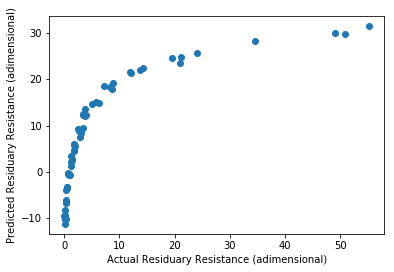

In [74]:
# Plot predicted values against test values
plt.scatter(test_y,predicted)
plt.xlabel('Actual Residuary Resistance (adimensional)')
plt.ylabel('Predicted Residuary Resistance (adimensional)')

In [73]:
# Get predicted values from test set using model
predicted = model.predict(test_x)
# Assess quality of model (r-squared term)
model.score(test_x, test_y)

0.5450299966509131

Our model explains 55% of the variation in the residuary resistance data and so will not useful for prediction.

#### Fitting a Prediction Model using Logged Residuary Resistance as the response variable

In [55]:
# Get training and test subsets for new model
train_x, test_x, train_y, test_y = train_test_split(df.drop(['Logged Residuary Resistance','Residuary Resistance'],axis=1),df['Logged Residuary Resistance'], test_size=0.2, random_state=42)

In [56]:
# Train the refitted model
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# Get prediction values from trained model using test set
predicted = model.predict(test_x)
# Assess model quality (r-squared value)
model.score(test_x, test_y)

0.9537278756704614

Our model explains 95% of the variation in residuary resistance data and will be useful for prediction. However, as we have applied a log transformation, we will have to apply a back transformation (i.e. exponentiation) in order to interpret the data.

In [58]:
# Get two-tailed p-values to check whether any explanatory variables are non-significant in predicting residuary resistance.
from scipy import stats

p_values = []
headers = []

for c in df:
    p_values.append(stats.pearsonr(df['Logged Residuary Resistance'],df[c])[1])
    headers.append(c)

print('P-Values for Variables:')
for i in range(0,len(headers)):
    print('{header} = {p_value:.4f}'.format(header=headers[i],p_value=p_values[i]))

P-Values for Variables:
Longitudinal Position = 0.7569
Prismatic Coefficient = 0.8310
Length-Displacement Ratio = 0.8009
Beam-Draught Ratio = 0.6574
Length-Beam Ratio = 0.8459
Froude Number = 0.0000
Residuary Resistance = 0.0000
Logged Residuary Resistance = 0.0000


We can see that the p-value for Froude number is statistically significant (p-value is below 0.05). We can also see that the other explanatory variables (excluding Froude number) are not useful for predicting the residuary resistance as their p-values are not statistically significant. We will see if we can improve the prediciton power of our previous model by dropping these insignificant terms from our model. 

In [64]:
# Get training and test subsets to use for refitted model
train_x, test_x, train_y, test_y = train_test_split(df.drop(['Logged Residuary Resistance','Residuary Resistance','Longitudinal Position','Prismatic Coefficient','Length-Displacement Ratio','Beam-Draught Ratio','Length-Beam Ratio'],axis=1),df['Logged Residuary Resistance'], test_size=0.2, random_state=42)

In [65]:
# Train refitted model
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted Residuary Resistance (adimensional)')

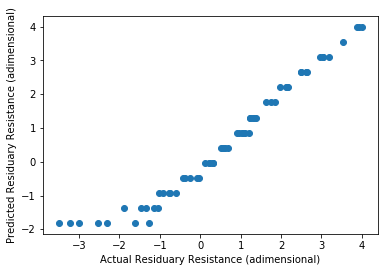

In [69]:
# Plot predicted values against test values
plt.scatter(test_y, predicted)
plt.xlabel('Actual Residuary Resistance (adimensional)')
plt.ylabel('Predicted Residuary Resistance (adimensional)')

In [66]:
# Get prediction values from test set
predicted = model.predict(test_x)
# Assess quality of refitted model
model.score(test_x, test_y)

0.9542681749401875

We can see that the quality of our new predictive model has increased, however not by much. Through this process, we have gone from a multiple linear regression model into a simple linear regression model. We will still need to apply a back transformation to interpret the data. 